<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/NLP_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%82%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D1%87%D0%B5%D1%80%D0%B5%D0%B7_Embedding_%2B_RNN_(accuracy_0_58)_%22dl_nlp_imdb_simple_rnn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Определение тональности текста отзывов на фильмы IMDB с помощью рекуррентной нейронной сети



Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 23s 133ms/step - loss: 0.6926 - accuracy: 0.5173 - val_loss: 0.6903 - val_accuracy: 0.5416
Epoch 2/15
176/176 [==============================] - 23s 133ms/step - loss: 0.6771 - accuracy: 0.5880 - val_loss: 0.6857 - val_accuracy: 0.5392
Epoch 3/15
176/176 [==============================] - 23s 133ms/step - loss: 0.6474 - accuracy: 0.6383 - val_loss: 0.6814 - val_accuracy: 0.5508
Epoch 4/15
176/176 [==============================] - 23s 130ms/step - loss: 0.6068 - accuracy: 0.6884 - val_loss: 0.6774 - val_accuracy: 0.5680
Epoch 5/15
176/176 [==============================] - 23s 131ms/step - loss: 0.5647 - accuracy: 0.7192 - val_loss: 0.6823 - val_accuracy: 0.5756
Epoch 6/15
176/176 [==============================] - 24s 136ms/step - loss: 0.5258 - accuracy: 0.7462 - val_loss: 0.6916 - val_accuracy: 0.5800
Epoch 7/15
176/176 [==============================] - 24s 137ms/step - loss: 0.4923 - accuracy: 0.7685 - val_loss: 0.7082 - val_ac

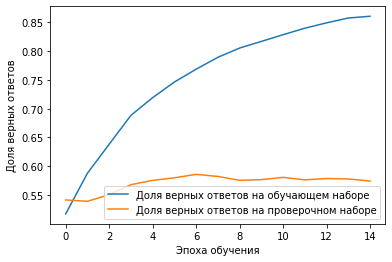

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 12s 15ms/step - loss: 0.9146 - accuracy: 0.5823


#Вывод: точность 58 %. Также сеть долго обчалась. Возможно следует добавить эпох или использовать архитектуры с другими слоями: LSTM и GRU